<a href="https://colab.research.google.com/github/joeneb24/Project-2/blob/main/Project2LifeInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Joseph Nebres

# Project 2: Life Insurance Underwriting

In [1]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatplotLib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

## Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQjrqP-rni9ezWD60lZS4QJWiQWO8Fu69iOQnBVs9nGosi6aD30PfoXYJBCrA-LIJ5Ek_giJQUf5OdG/pub?gid=517654057&single=true&output=csv')
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


## Data Exploration





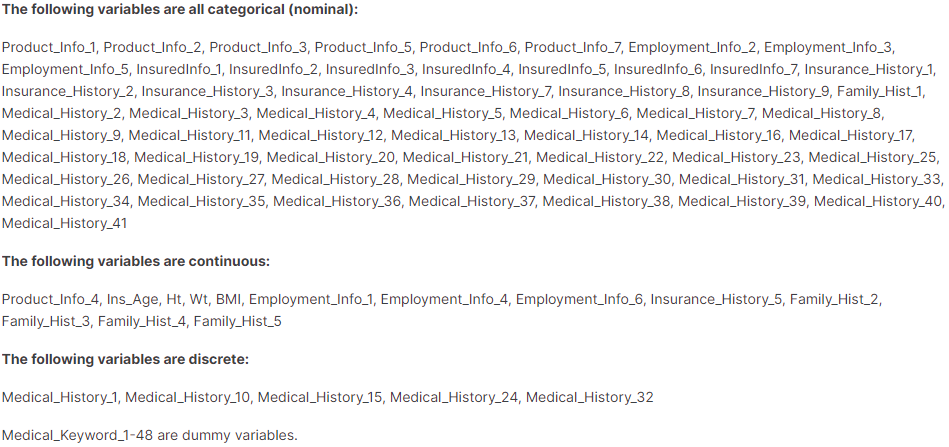

In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 128 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    Id                   59381 non-null  int64  
 1    Product_Info_1       59381 non-null  int64  
 2    Product_Info_2       59381 non-null  object 
 3    Product_Info_3       59381 non-null  int64  
 4    Product_Info_4       59381 non-null  float64
 5    Product_Info_5       59381 non-null  int64  
 6    Product_Info_6       59381 non-null  int64  
 7    Product_Info_7       59381 non-null  int64  
 8    Ins_Age              59381 non-null  float64
 9    Ht                   59381 non-null  float64
 10   Wt                   59381 non-null  float64
 11   BMI                  59381 non-null  float64
 12   Employment_Info_1    59362 non-null  float64
 13   Employment_Info_2    59381 non-null  int64  
 14   Employment_Info_3    59381 non-null  int64  
 15   Employment_Info_4

We see that there are more than the suggested 25 features, therefore we will choose which columns to highlight what we know about data cleaning and machine learning for this particular project. I will choose the columns that I believe are the best to show my skill set as a data scientist. In this case, I will choose the object feature 'Product_Info_2' and the customer's height and weight. In insurance, high and weight are important in determining someone's premium and if they are approved for a certain policy, as well as there  health rating. I also included at least one column from each category to make the problem more interesting. I chose the columns with missing data to show my process of data cleaning. Again, the 'Response' is the target we are trying to predict. Also, from the data dictionary, the columns 'Medical_Keyword' are dummy values, so we will drop these as well. 

In [4]:
df.shape

(59381, 128)

In [5]:
df = df[['Id', 'Product_Info_1','Product_Info_2','Product_Info_3','Product_Info_4','Product_Info_5','Product_Info_6','Product_Info_7',
         'Ins_Age','Ht','Wt','BMI','Employment_Info_4', 'Employment_Info_6', 'InsuredInfo_1', 'Insurance_History_1', 'Insurance_History_5',
         'Family_Hist_1','Family_Hist_2','Family_Hist_3', 'Family_Hist_4','Family_Hist_5','Medical_History_1','Medical_History_2','Medical_History_10',
         'Medical_History_15','Medical_History_24','Medical_History_32','Response']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   59381 non-null  int64  
 1   Product_Info_1       59381 non-null  int64  
 2   Product_Info_2       59381 non-null  object 
 3   Product_Info_3       59381 non-null  int64  
 4   Product_Info_4       59381 non-null  float64
 5   Product_Info_5       59381 non-null  int64  
 6   Product_Info_6       59381 non-null  int64  
 7   Product_Info_7       59381 non-null  int64  
 8   Ins_Age              59381 non-null  float64
 9   Ht                   59381 non-null  float64
 10  Wt                   59381 non-null  float64
 11  BMI                  59381 non-null  float64
 12  Employment_Info_4    52602 non-null  float64
 13  Employment_Info_6    48527 non-null  float64
 14  InsuredInfo_1        59381 non-null  int64  
 15  Insurance_History_1  59381 non-null 

In [7]:
df.shape

(59381, 29)

We have narrowed the data features to 28, but will lower that number here soon since some features are missing too much data to account for in our modeling. 

## Data Cleaning

We see that the columns 'Family_Hist_3','Family_Hist_5','Medical_History_10','Medical_History_15','Medical_History_24', and 'Medical_History_32' are all missing more than 50% of data, therefore will drop these columns. 

In [8]:
df.drop(columns = ['Family_Hist_3','Family_Hist_5','Medical_History_10','Medical_History_15','Medical_History_24', 'Medical_History_32'], inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   59381 non-null  int64  
 1   Product_Info_1       59381 non-null  int64  
 2   Product_Info_2       59381 non-null  object 
 3   Product_Info_3       59381 non-null  int64  
 4   Product_Info_4       59381 non-null  float64
 5   Product_Info_5       59381 non-null  int64  
 6   Product_Info_6       59381 non-null  int64  
 7   Product_Info_7       59381 non-null  int64  
 8   Ins_Age              59381 non-null  float64
 9   Ht                   59381 non-null  float64
 10  Wt                   59381 non-null  float64
 11  BMI                  59381 non-null  float64
 12  Employment_Info_4    52602 non-null  float64
 13  Employment_Info_6    48527 non-null  float64
 14  InsuredInfo_1        59381 non-null  int64  
 15  Insurance_History_1  59381 non-null 

In [11]:
df['Id'].value_counts().sum()

59381

The 'Id' column will not help us for predictions, so we will drop the column.

In [12]:
df.drop(columns='Id', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Info_1       59381 non-null  int64  
 1   Product_Info_2       59381 non-null  object 
 2   Product_Info_3       59381 non-null  int64  
 3   Product_Info_4       59381 non-null  float64
 4   Product_Info_5       59381 non-null  int64  
 5   Product_Info_6       59381 non-null  int64  
 6   Product_Info_7       59381 non-null  int64  
 7   Ins_Age              59381 non-null  float64
 8   Ht                   59381 non-null  float64
 9   Wt                   59381 non-null  float64
 10  BMI                  59381 non-null  float64
 11  Employment_Info_4    52602 non-null  float64
 12  Employment_Info_6    48527 non-null  float64
 13  InsuredInfo_1        59381 non-null  int64  
 14  Insurance_History_1  59381 non-null  int64  
 15  Insurance_History_5  33985 non-null 

In [14]:
df.isna().sum()

Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_4       6779
Employment_Info_6      10854
InsuredInfo_1              0
Insurance_History_1        0
Insurance_History_5    25396
Family_Hist_1              0
Family_Hist_2          28656
Family_Hist_4          19184
Medical_History_1       8889
Medical_History_2          0
Response                   0
dtype: int64

We see that there are 6 columns missing data, we will deal with this during our data preprocessing. We will not deal with this now, since we do not want data leakage. 

In [15]:
df['Product_Info_1'].describe()

count    59381.000000
mean         1.026355
std          0.160191
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Product_Info_1, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical. 

In [16]:
df['Product_Info_1'] = df['Product_Info_1'].astype(object)

In [17]:
df['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

Without much context on what these values mean,this data looks normal, no inconsistencies. 

In [18]:
df['Product_Info_3'].describe()

count    59381.000000
mean        24.415655
std          5.072885
min          1.000000
25%         26.000000
50%         26.000000
75%         26.000000
max         38.000000
Name: Product_Info_3, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical. 

In [19]:
df['Product_Info_3'] = df['Product_Info_3'].astype(object)

In [20]:
df['Product_Info_4'].describe()

count    59381.000000
mean         0.328952
std          0.282562
min          0.000000
25%          0.076923
50%          0.230769
75%          0.487179
max          1.000000
Name: Product_Info_4, dtype: float64

This data looks normal, no large outliers.


In [21]:
df['Product_Info_5'].describe()

count    59381.000000
mean         2.006955
std          0.083107
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Product_Info_5, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.

In [22]:
df['Product_Info_5'] = df['Product_Info_5'].astype(object)

In [23]:
df['Product_Info_6'].describe()

count    59381.000000
mean         2.673599
std          0.739103
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Product_Info_6, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.



In [24]:
df['Product_Info_6'] = df['Product_Info_6'].astype(object)

In [25]:
df['Product_Info_7'].describe()

count    59381.000000
mean         1.043583
std          0.291949
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Product_Info_7, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.



In [26]:
df['Product_Info_7'] = df['Product_Info_7'].astype(object)

In [27]:
df['Ins_Age'].describe()

count    59381.000000
mean         0.405567
std          0.197190
min          0.000000
25%          0.238806
50%          0.402985
75%          0.567164
max          1.000000
Name: Ins_Age, dtype: float64

Since Ins_age from the data dictionary says that age is Normalized, it makes sense that the max age is 100. We will try to see where the 0 age is coming from, since we should be able to apply for insurance is a person is 0 years old. 

In [28]:
age_filter = df['Ins_Age'] <= 0
df[age_filter]

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Employment_Info_6,InsuredInfo_1,Insurance_History_1,Insurance_History_5,Family_Hist_1,Family_Hist_2,Family_Hist_4,Medical_History_1,Medical_History_2,Response
197,1,D1,26,0.076923,2,3,1,0.0,0.636364,0.184100,...,0.0000,1,2,NaN,3,0.159420,0.112676,86.0,491,4
431,1,A1,37,0.230769,2,3,1,0.0,0.636364,0.320084,...,NaN,1,2,NaN,2,0.130435,NaN,9.0,261,7
502,1,A1,26,0.179487,2,3,1,0.0,0.672727,0.299163,...,0.0000,1,2,NaN,2,0.173913,0.126761,10.0,112,6
558,1,E1,26,1.000000,2,3,1,0.0,0.600000,0.165272,...,0.0000,1,2,NaN,2,0.231884,0.211268,2.0,491,8
576,1,D4,26,0.076923,2,1,1,0.0,0.600000,0.257322,...,NaN,1,2,NaN,3,0.130435,0.126761,NaN,162,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58549,1,A1,31,0.076923,2,3,1,0.0,0.727273,0.205021,...,NaN,1,2,NaN,3,0.376812,0.239437,2.0,261,8
58617,1,A8,26,0.025641,2,3,1,0.0,0.781818,0.267782,...,0.0030,1,2,NaN,3,NaN,0.309859,4.0,112,5
58618,1,D4,26,0.076923,2,3,1,0.0,0.636364,0.225941,...,0.0005,1,2,0.000013,3,0.246377,0.225352,1.0,16,5
58836,2,E1,31,0.230769,2,3,1,0.0,0.727273,0.267782,...,NaN,1,2,NaN,3,0.275362,0.239437,NaN,162,6


We will drop these Age 0 applicants, even with age being normalized, 0 means an unborn person. 

In [29]:
# Indexes 'Ins_Age' that are less than or equal to 0. 
indexAge = df[df['Ins_Age'] <= 0].index

In [30]:
# Dropping 'Ins_Age' that are equal to or less than 0.
df.drop(indexAge, inplace =True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59094 entries, 0 to 59380
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Info_1       59094 non-null  object 
 1   Product_Info_2       59094 non-null  object 
 2   Product_Info_3       59094 non-null  object 
 3   Product_Info_4       59094 non-null  float64
 4   Product_Info_5       59094 non-null  object 
 5   Product_Info_6       59094 non-null  object 
 6   Product_Info_7       59094 non-null  object 
 7   Ins_Age              59094 non-null  float64
 8   Ht                   59094 non-null  float64
 9   Wt                   59094 non-null  float64
 10  BMI                  59094 non-null  float64
 11  Employment_Info_4    52324 non-null  float64
 12  Employment_Info_6    48359 non-null  float64
 13  InsuredInfo_1        59094 non-null  int64  
 14  Insurance_History_1  59094 non-null  int64  
 15  Insurance_History_5  33938 non-null 

We see that the rows that have age at 0 or less have been dropped, hence the 59094 rows of data. 

In [32]:
df['Ins_Age'].describe()

count    59094.000000
mean         0.407536
std          0.195627
min          0.014925
25%          0.238806
50%          0.402985
75%          0.567164
max          1.000000
Name: Ins_Age, dtype: float64

We now see that the min Ins_age is at 0.014925. 

In [33]:
df['Ht'].describe()

count    59094.000000
mean         0.707344
std          0.074233
min          0.000000
25%          0.654545
50%          0.709091
75%          0.763636
max          1.000000
Name: Ht, dtype: float64

Like the Ins_Age, 'Ht' is normalized, but the 0 min height still makes no sense, we will drop that too. 

In [34]:
height_filter = df['Ht'] <= 0
df[height_filter]

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Employment_Info_6,InsuredInfo_1,Insurance_History_1,Insurance_History_5,Family_Hist_1,Family_Hist_2,Family_Hist_4,Medical_History_1,Medical_History_2,Response
36117,1,D2,26,0.179487,2,1,1,0.58209,0.0,0.372385,...,1.0,1,2,0.001667,2,NaN,NaN,4.0,3,2


In [35]:
# Indexes 'Ht' that are less than or equal to 0. 
indexHeight = df[df['Ht'] <= 0].index

In [36]:
# Dropping 'Ht' that are equal to or less than 0.
df.drop(indexHeight, inplace =True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59093 entries, 0 to 59380
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Info_1       59093 non-null  object 
 1   Product_Info_2       59093 non-null  object 
 2   Product_Info_3       59093 non-null  object 
 3   Product_Info_4       59093 non-null  float64
 4   Product_Info_5       59093 non-null  object 
 5   Product_Info_6       59093 non-null  object 
 6   Product_Info_7       59093 non-null  object 
 7   Ins_Age              59093 non-null  float64
 8   Ht                   59093 non-null  float64
 9   Wt                   59093 non-null  float64
 10  BMI                  59093 non-null  float64
 11  Employment_Info_4    52323 non-null  float64
 12  Employment_Info_6    48358 non-null  float64
 13  InsuredInfo_1        59093 non-null  int64  
 14  Insurance_History_1  59093 non-null  int64  
 15  Insurance_History_5  33937 non-null 

We see that there is one less row, so we removed the data that has a height of 0.

In [38]:
df['Ht'].describe()

count    59093.000000
mean         0.707356
std          0.074177
min          0.090909
25%          0.654545
50%          0.709091
75%          0.763636
max          1.000000
Name: Ht, dtype: float64

The min hieght is no longer 0. 

In [39]:
df['Wt'].describe()

count    59093.000000
mean         0.292816
std          0.089011
min          0.000000
25%          0.225941
50%          0.288703
75%          0.347280
max          1.000000
Name: Wt, dtype: float64

Like the Ht, 'Wt' is normalized, but the 0 min weight still makes no sense, we will drop that too. 

In [40]:
weight_filter = df['Wt'] <= 0
df[weight_filter]

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Employment_Info_6,InsuredInfo_1,Insurance_History_1,Insurance_History_5,Family_Hist_1,Family_Hist_2,Family_Hist_4,Medical_History_1,Medical_History_2,Response
14351,1,E1,37,0.230769,2,3,1,0.104478,0.6,0.0,...,0.0,3,2,NaN,3,0.289855,0.183099,NaN,162,8


In [41]:
# Indexes 'Wt' that are less than or equal to 0. 
indexWeight = df[df['Wt'] <= 0].index

In [42]:
# Dropping 'Wt' that are equal to or less than 0.
df.drop(indexWeight, inplace =True)

In [43]:
df['Wt'].describe()

count    59092.000000
mean         0.292821
std          0.089003
min          0.058577
25%          0.225941
50%          0.288703
75%          0.347280
max          1.000000
Name: Wt, dtype: float64

We see that there is one less row, so we removed the data that has a height of 0. We also see that the min is no longer 0. 

In [44]:
df['BMI'].describe()

count    59092.000000
mean         0.469801
std          0.122129
min          0.058838
25%          0.386163
50%          0.452515
75%          0.533020
max          1.000000
Name: BMI, dtype: float64

'BMI' all looks normal, no outliers, once again the BMI is normalized. 

In [45]:
df['Employment_Info_4'].describe()

count    52322.000000
mean         0.006311
std          0.032897
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Employment_Info_4, dtype: float64

Without much context on what these values mean,this data looks normal, no inconsistencies. 

In [46]:
df['Employment_Info_6'].describe()

count    48357.000000
mean         0.362651
std          0.349525
min          0.000000
25%          0.060000
50%          0.250000
75%          0.550000
max          1.000000
Name: Employment_Info_6, dtype: float64

Without much context on what these values mean,this data looks normal, no inconsistencies. 



In [47]:
df['InsuredInfo_1'].describe()

count    59092.000000
mean         1.209758
std          0.418090
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: InsuredInfo_1, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.

In [48]:
df['InsuredInfo_1'] = df['InsuredInfo_1'].astype(object)

In [49]:
df['Insurance_History_1'].describe()

count    59092.000000
mean         1.726664
std          0.445676
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Insurance_History_1, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.

In [50]:
df['Insurance_History_1'] = df['Insurance_History_1'].astype(object)

In [51]:
df['Insurance_History_5'].describe()

count    33937.000000
mean         0.001735
std          0.007343
min          0.000000
25%          0.000400
50%          0.000993
75%          0.002000
max          1.000000
Name: Insurance_History_5, dtype: float64

Without much context on what these values mean,this data looks normal, no inconsistencies. 

In [52]:
df['Family_Hist_1'].describe()

count    59092.000000
mean         2.685135
std          0.483601
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Family_Hist_1, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.

In [53]:
df['Family_Hist_1'] = df['Family_Hist_1'].astype(object)

In [54]:
df['Family_Hist_2'].describe()

count    30481.000000
mean         0.476568
std          0.153717
min          0.028986
25%          0.362319
50%          0.463768
75%          0.579710
max          1.000000
Name: Family_Hist_2, dtype: float64

This data looks normal, no large outliers. 

In [55]:
df['Family_Hist_4'].describe()

count    39925.000000
mean         0.446748
std          0.161857
min          0.000000
25%          0.323944
50%          0.436620
75%          0.563380
max          0.943662
Name: Family_Hist_4, dtype: float64

This data looks normal, no large outliers. 

In [56]:
df['Medical_History_1'].describe()

count    50259.000000
mean         7.957799
std         13.035598
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max        240.000000
Name: Medical_History_1, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.

In [57]:
df['Medical_History_1'] = df['Medical_History_1'].astype(object)

In [58]:
df['Medical_History_2'].describe()

count    59092.000000
mean       253.958218
std        178.641885
min          1.000000
25%        112.000000
50%        162.000000
75%        418.000000
max        648.000000
Name: Medical_History_2, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.

In [59]:
df['Medical_History_2'] = df['Medical_History_2'].astype(object)

In [85]:
df['Response'].describe()

count    59092.000000
mean         5.634299
std          2.457040
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          8.000000
Name: Response, dtype: float64

This data looks normal, no large outliers. The only thing we need to change is that this data type is suppose to be an object since the data dictionary labels it as nominal categorical.

In [86]:
df['Response'] = df['Response'].astype(object)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59092 entries, 0 to 59380
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Info_1       59092 non-null  object 
 1   Product_Info_2       59092 non-null  object 
 2   Product_Info_3       59092 non-null  object 
 3   Product_Info_4       59092 non-null  float64
 4   Product_Info_5       59092 non-null  object 
 5   Product_Info_6       59092 non-null  object 
 6   Product_Info_7       59092 non-null  object 
 7   Ins_Age              59092 non-null  float64
 8   Ht                   59092 non-null  float64
 9   Wt                   59092 non-null  float64
 10  BMI                  59092 non-null  float64
 11  Employment_Info_4    52322 non-null  float64
 12  Employment_Info_6    48357 non-null  float64
 13  InsuredInfo_1        59092 non-null  object 
 14  Insurance_History_1  59092 non-null  object 
 15  Insurance_History_5  33937 non-null 

As we can see, the dtypes from above match with the data dictionary. We will deal with missing values during preprocessing. 

## Exploratory Visualizations


<Axes: xlabel='Product_Info_1', ylabel='count'>

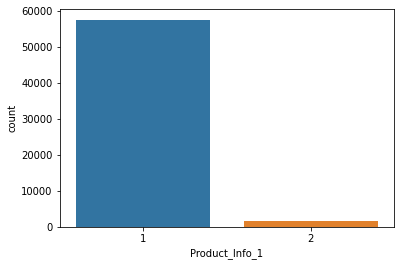

In [61]:
sns.countplot(x=df["Product_Info_1"])

We see that most of the customer's are 1. 

<Axes: xlabel='Product_Info_2', ylabel='count'>

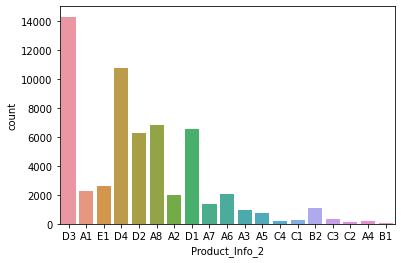

In [62]:
sns.countplot(x=df["Product_Info_2"])

We see that most of the customer's are 1. 

<Axes: xlabel='Product_Info_3', ylabel='count'>

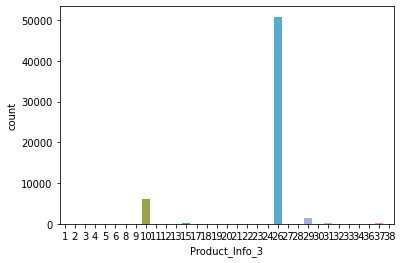

In [63]:
sns.countplot(x=df["Product_Info_3"])

We see that most of the customer's are 62. 

<Axes: xlabel='Product_Info_4', ylabel='Count'>

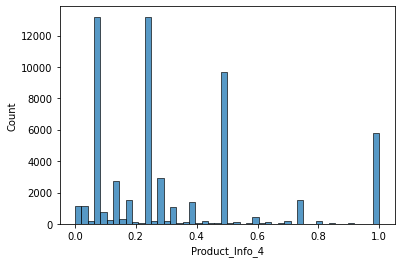

In [64]:
sns.histplot(data=df, x='Product_Info_4')

We see that most of the customers are scattered. 

<Axes: xlabel='Product_Info_5', ylabel='count'>

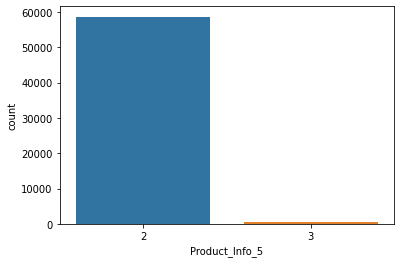

In [65]:
sns.countplot(x=df["Product_Info_5"])

We see that most of the customer's are 2.

<Axes: xlabel='Product_Info_6', ylabel='count'>

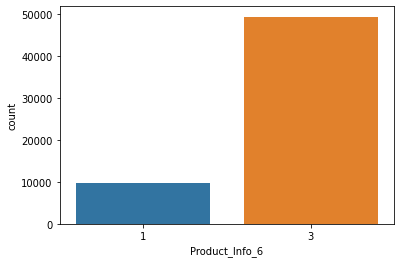

In [66]:
sns.countplot(x=df["Product_Info_6"])

We see that most of the customer's are 3. 

<Axes: xlabel='Product_Info_7', ylabel='count'>

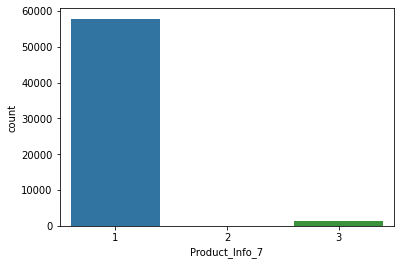

In [67]:
sns.countplot(x=df["Product_Info_7"])

We see that most of the customer's are 1. 

<Axes: xlabel='Ins_Age', ylabel='Count'>

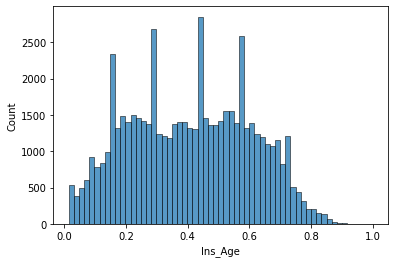

In [68]:
sns.histplot(data=df, x='Ins_Age')

We see that most of the customer are distributed evenly from 0.3 to o.7. 

<Axes: xlabel='Ht', ylabel='Count'>

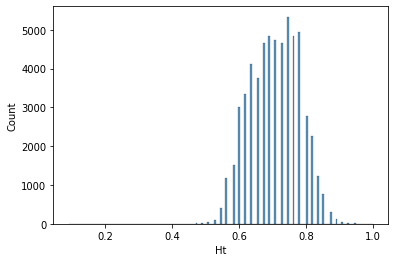

In [69]:
sns.histplot(data=df, x='Ht')

We see that most of the customer are distributed evenly from 0.6 to o.8. 

<Axes: xlabel='Wt', ylabel='Count'>

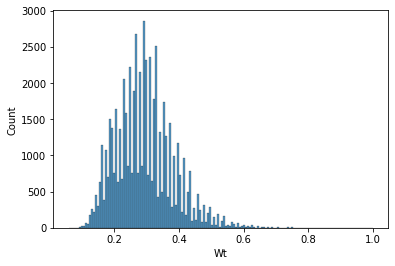

In [70]:
sns.histplot(data=df, x='Wt')

We see that most of the customer are distributed evenly from 0.3 to o.4. 

<Axes: xlabel='BMI', ylabel='Count'>

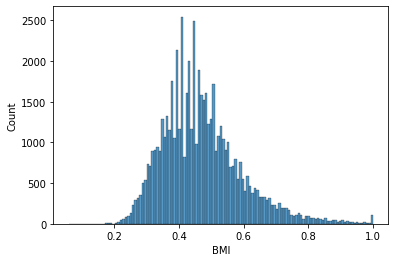

In [71]:
sns.histplot(data=df, x='BMI')

We see that most of the customer are distributed evenly from 0.4 to o.6. 

<Axes: xlabel='Employment_Info_4', ylabel='Count'>

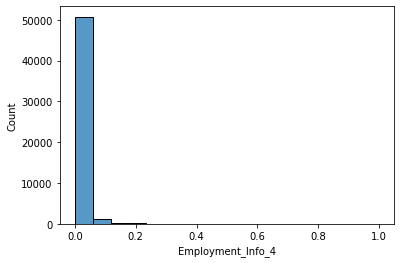

In [72]:
sns.histplot(data=df, x='Employment_Info_4')

We see that most of the customer are near 0. 

<Axes: xlabel='Employment_Info_6', ylabel='Count'>

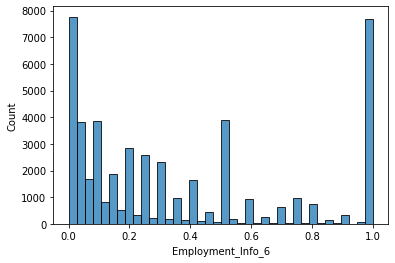

In [73]:
sns.histplot(data=df, x='Employment_Info_6')

We see that most of the customer are distributed randomly.

<Axes: xlabel='InsuredInfo_1', ylabel='count'>

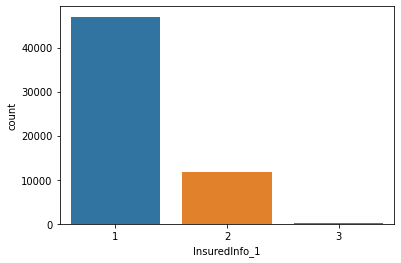

In [74]:
sns.countplot(x=df["InsuredInfo_1"])

We see that most of the customer are 1.


<Axes: xlabel='Insurance_History_1', ylabel='count'>

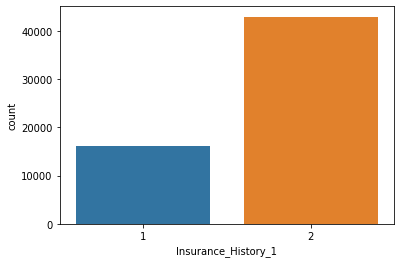

In [75]:
sns.countplot(x=df["Insurance_History_1"])

In [ ]:
We see that most of the customer are 2.

<Axes: xlabel='Insurance_History_5', ylabel='Count'>

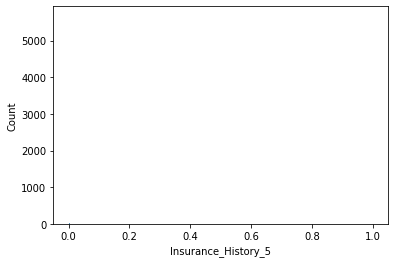

In [76]:
sns.histplot(data=df, x='Insurance_History_5')

In [77]:
df['Insurance_History_5'].value_counts()

0.000667    5331
0.001667    3550
0.003333    2884
0.000333    2486
0.001000    1530
            ... 
0.001001       1
0.000039       1
0.001662       1
0.001287       1
0.001377       1
Name: Insurance_History_5, Length: 2263, dtype: int64

We see that most of the customer are near 0. 

<Axes: xlabel='Family_Hist_1', ylabel='count'>

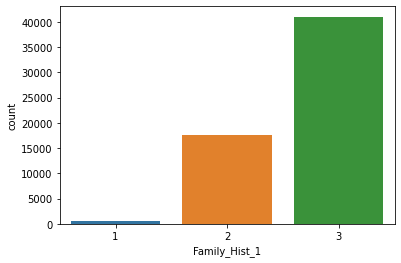

In [78]:
sns.countplot(x=df["Family_Hist_1"])

We see that most of the customer are 3.

<Axes: xlabel='Family_Hist_2', ylabel='Count'>

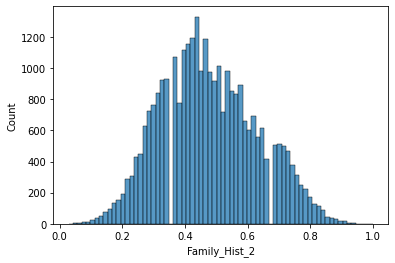

In [79]:
sns.histplot(data=df, x='Family_Hist_2')

We see that most of the customer are distributed from 0.3 to 0.7.





<Axes: xlabel='Family_Hist_4', ylabel='Count'>

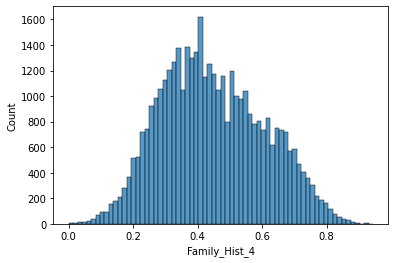

In [80]:
sns.histplot(data=df, x='Family_Hist_4')

We see that most of the customer are distributed from 0.3 to 0.6.


<Axes: xlabel='Medical_History_1', ylabel='count'>

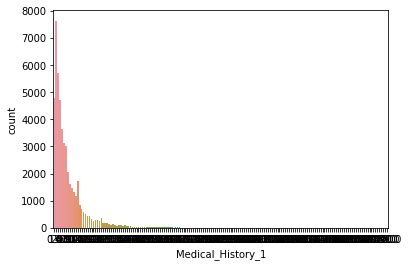

In [81]:
sns.countplot(x=df["Medical_History_1"])

In [83]:
df['Medical_History_1'].value_counts()

1.0      7626
2.0      5708
0.0      4772
3.0      4704
4.0      3651
         ... 
161.0       1
201.0       1
191.0       1
141.0       1
187.0       1
Name: Medical_History_1, Length: 171, dtype: int64

We see that most of the customer are near 1.


<Axes: xlabel='Medical_History_2', ylabel='count'>

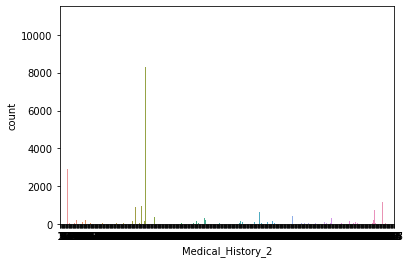

In [82]:
sns.countplot(x=df["Medical_History_2"])

In [84]:
df['Medical_History_2'].value_counts()

112    10959
162     8292
491     5764
335     3022
161     2938
       ...  
210        1
593        1
580        1
321        1
158        1
Name: Medical_History_2, Length: 579, dtype: int64

We see that most of the customer are distributed randomly. 


<Axes: xlabel='Response', ylabel='count'>

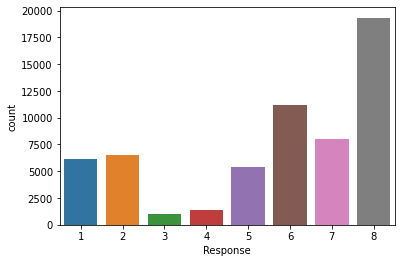

In [89]:
sns.countplot(x=df["Response"])

We see that most of the customer are 8. 


In [90]:
corr = df.corr()

<Axes: >

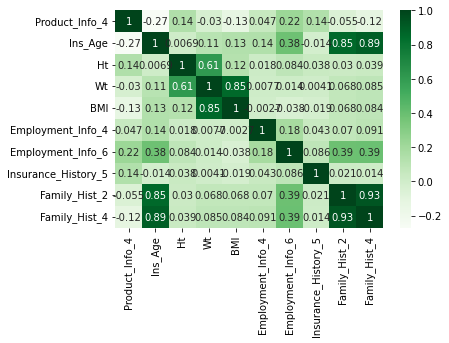

In [91]:
sns.heatmap(corr, cmap = 'Greens', annot = True)

We see that they are strong correlations with Ins_Age and Family_Hist_2, Ins_age and Family_Hist_4, and Family_Hist_4 and Family_Hist_2. They are moderate correlations between Employment_Info_6 with Family_Hist2 and Family_Hist_4. 